# Workbook 00 - Solving beams with `PyNite`

In [5]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model

# Task 01

Create a `FEModel3D` object to analyze the following beam, where the green loads represent dead load and the orange load represents live load:

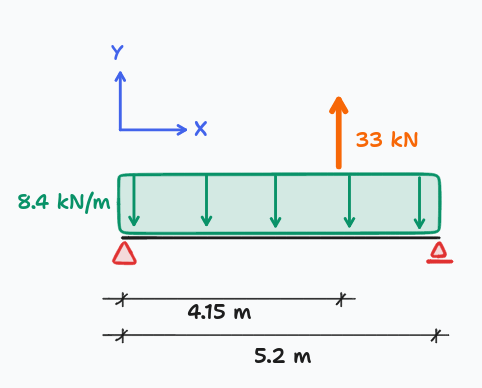

The beam is to have the following attributes:

```
E = 23000 MPa
Iz = 400e6 MPa
```

* Use `print()` to print the reactions
* Plot the shear diagram
* PLot the moment diagram

## Task 01 Response

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+--------+--------+--------+--------+--------+---------+--------+---------+--------+---------+
| Load Combination | Sum FX | Sum RX | Sum FY | Sum RY | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY | Sum MZ | Sum RMZ |
+------------------+--------+--------+--------+--------+--------+--------+--------+---------+--------+---------+--------+---------+
|       LC1        |   0    |   0    | -10.7  |  10.7  |   0    |   0    |   0    |    0    |   0    |    0    |  23.4  |  -23.4  |
+------------------+--------+--------+--------+--------+--------+--------+--------+---------+--------+---------+--------+---------+

{'LC1': 15.176538461538456}
{'LC1': -4.496538461538453}


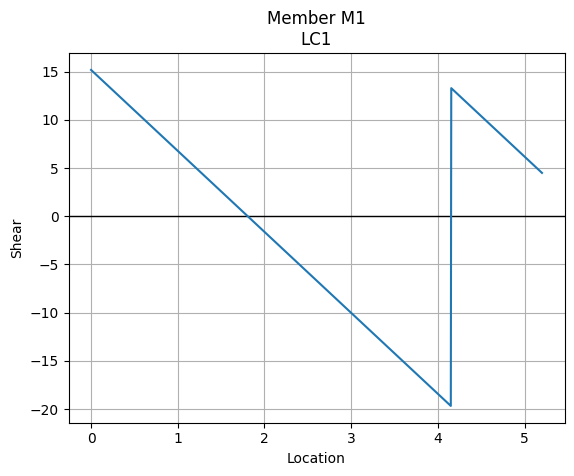

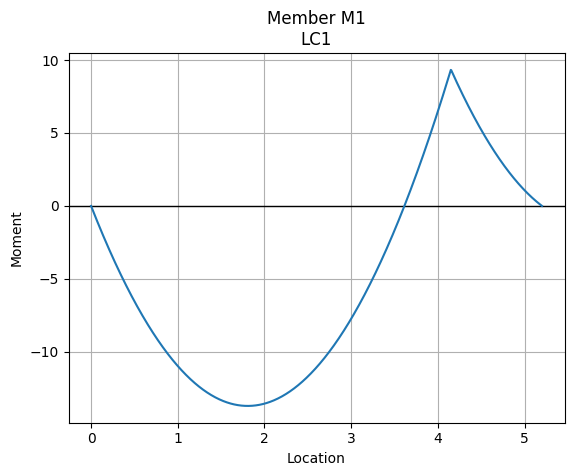

In [6]:
# This is me completing the workbook
beam_01 = FEModel3D()

beam_01.add_node('node1', 0, 0, 0)
beam_01.add_node('node2', 5.2, 0, 0)

beam_01.add_member('M1','node1', 'node2', 23000, 1, 1, 400e+6, 1, 1)
                   
beam_01.def_support('node1', support_DX=True, support_DY=True, support_DZ=True, support_RX=True)
beam_01.def_support('node2', support_DY=True, support_DZ=True)
                   
beam_01.add_load_combo('LC1', {'DeadLoad':1.0, 'LiveLoad':1.0})
                   
beam_01.add_member_dist_load('M1', 'Fy', w1=-8.4, w2=-8.4, x1=0, x2=5.2, case='DeadLoad')
beam_01.add_member_pt_load('M1', 'Fy',  P=33, x=4.15, case='DeadLoad')
                           
beam_01.analyze(check_statics=True)

# render_model(beam_01, combo_name='LC1', annotation_size=0.5)

print(beam_01.Nodes['node1'].RxnFY)
print(beam_01.Nodes['node2'].RxnFY)

beam_01.Members['M1'].plot_shear(Direction='Fy', combo_name='LC1', n_points=1000)
beam_01.Members['M1'].plot_moment(Direction='Mz', combo_name='LC1', n_points=1000)

# Task 02

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 3.6 m long
* 45 MPa concrete, 300x600 dp beam
* Fixed support @:
    * 0 m  
* Loads as follows:
    * UDL of self-weight
    * UDL of 60 kN/m Live load
    * Point load of 175 kN @ 2.2 m Live load
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

Note: You will need to calculate the E and I of the beam. You can use whatever code calculations you like but remember you need to keep your force/distance/stress units consistent across all inputs in order for the results to make sense.

## Task 02 Response

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |   Sum MZ  | Sum RMZ  |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
|       LC1        |   0    |   0    | -4.07e+05 | 4.07e+05 |   0    |   0    |   0    |    0    |   0    |    0    | -8.03e+08 | 8.03e+08 |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+

{'LC1': 407199.99999999994}
{'LC1': 802960000.0000001}
{'LC1': -19.023879506172843}


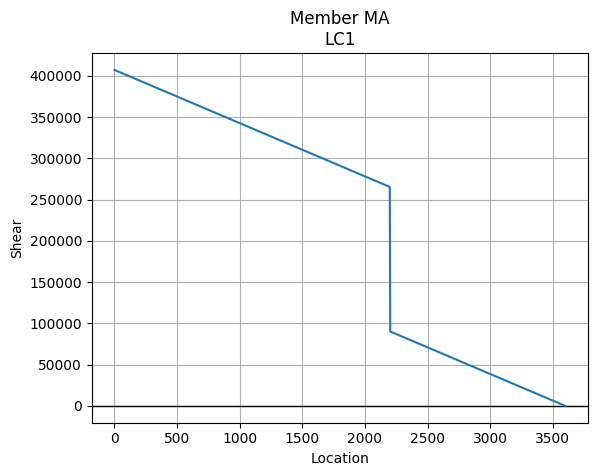

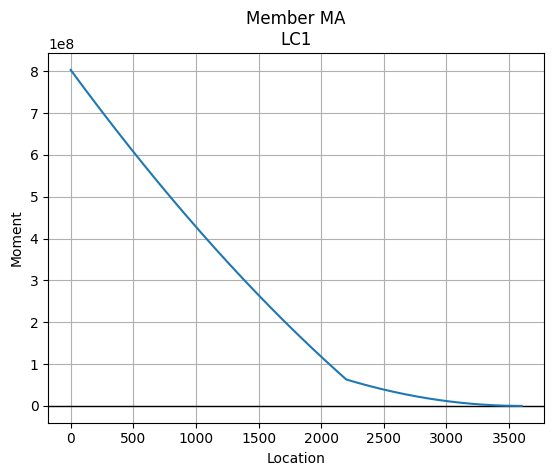

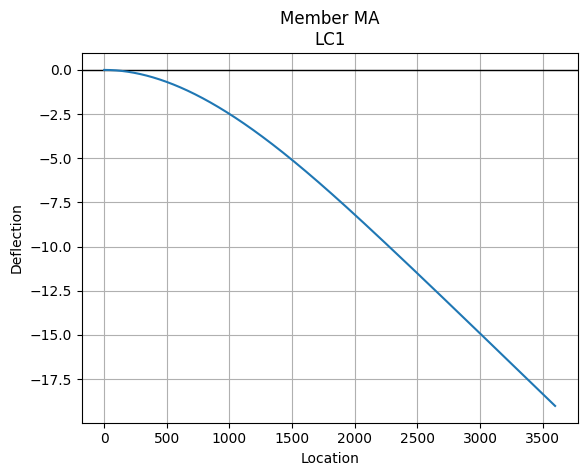

In [7]:
beam_A = FEModel3D()
width = 300 # mm
height = 600 # mm
length = 3600 # mm
E = 25000 # MPa

A = width * height # m^2
I_z = 1/12*width*height**3 # m^4
UDL_Self = -(A * 25e-6) # N/mm^1 = kN/m^1 
UDL_Live = -60 # N/mm^1 = kN/m^1 
Pt_Live = -175000 # N

beam_A.add_node('node1', 0, 0, 0)
beam_A.add_node('node2', length, 0, 0)

beam_A.add_member('MA','node1', 'node2', E, 1, 1, I_z, 1, A)
                   
beam_A.def_support('node1', support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RZ=True)
                 
beam_A.add_load_combo('LC1', {'DeadLoad':1.0, 'LiveLoad':1.0})
                   
beam_A.add_member_dist_load('MA', 'Fy', w1=UDL_Self, w2=UDL_Self, x1=0, x2=length, case='DeadLoad')
beam_A.add_member_dist_load('MA', 'Fy', w1=UDL_Live, w2=UDL_Live, x1=0, x2=length, case='LiveLoad')
beam_A.add_member_pt_load('MA', 'Fy',  P=Pt_Live, x=2200, case='LiveLoad')
                           
beam_A.analyze(check_statics=True)

# render_model(beam_A, combo_name='LC1', annotation_size=500)

print(beam_A.Nodes['node1'].RxnFY) # N
print(beam_A.Nodes['node1'].RxnMZ) # Nmm
print(beam_A.Nodes['node2'].DY) # mm

beam_A.Members['MA'].plot_shear(Direction='Fy', combo_name='LC1', n_points=1000) # N
beam_A.Members['MA'].plot_moment(Direction='Mz', combo_name='LC1', n_points=1000) # Nmm
beam_A.Members['MA'].plot_deflection(Direction='dy', combo_name='LC1', n_points=1000) # mm

# Task 03

**Option A:** If you are from the US and want to try using US units:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 168 inches long
* E and Iz are 58e3 ksi and 1200 ${in^4}$, respectively
* Vertical supports @:
    * 24 inches, 96 inches, 132  inches
* Loads as follows:
    * Point load: 5 kips, @ 48 inches
    * Uniform distributed load: 60 lbs/inch starting @ 12 inches, ending @ 120 inches
    
    
**Option B:** If you are from pretty much anywhere else:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 4200 mm long
* E and Iz are 200e3 ksi and 854e6 ${mm^4}$, respectively
* Vertical supports @:
    * 600 mm, 2440 mm, 3350 mm
* Loads as follows:
    * Point load: 25 kN, @ 1200 inches
    * Uniform distributed load: 2.4 kN starting at 300 mm, ending @ 3000 mm
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

## Task 03 Response

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+--------+--------+--------+--------+--------+---------+--------+---------+--------+---------+
| Load Combination | Sum FX | Sum RX | Sum FY | Sum RY | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY | Sum MZ | Sum RMZ |
+------------------+--------+--------+--------+--------+--------+--------+--------+---------+--------+---------+--------+---------+
|       LC1        |   0    |   0    | -31.5  |  31.5  |   0    |   0    |   0    |    0    |   0    |    0    | -85.7  |   85.7  |
+------------------+--------+--------+--------+--------+--------+--------+--------+---------+--------+---------+--------+---------+

{'LC1': 1.649284093802156}
{'LC1': 18.589694460352593}
{'LC1': 11.241021445845249}


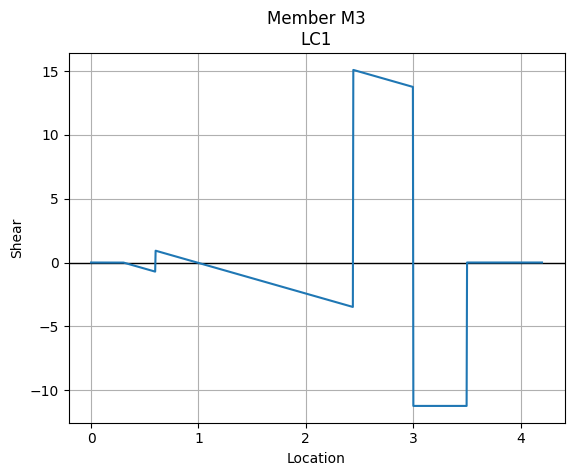

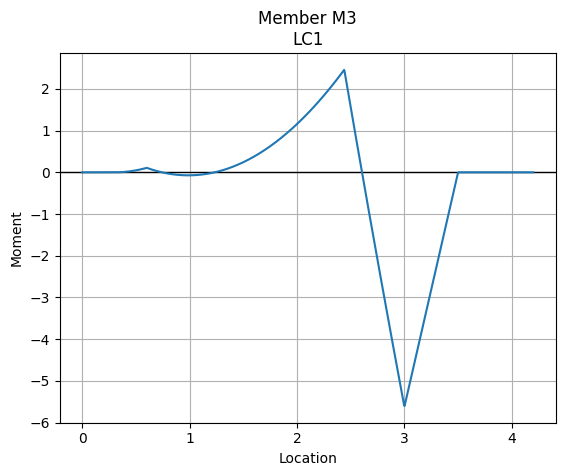

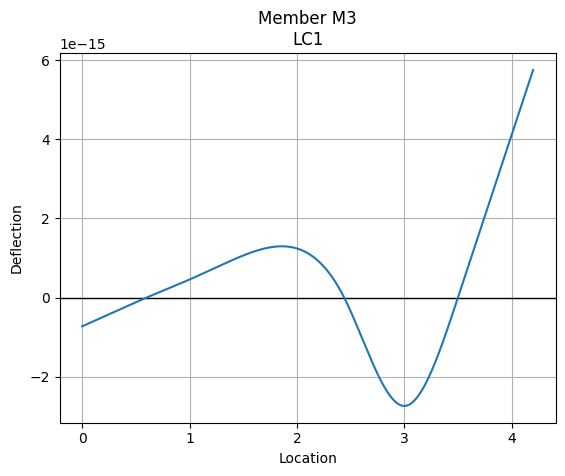

In [8]:
beam_03 = FEModel3D()

E = 200e3 # ksi
I_z = 854e6 # mm4

beam_03.add_node('node1', 0.00, 0, 0)
beam_03.add_node('node2', 0.60, 0, 0)
beam_03.add_node('node3', 2.44, 0, 0)
beam_03.add_node('node4', 3.50, 0, 0)
beam_03.add_node('node5', 4.20, 0, 0)


beam_03.add_member('M3','node1', 'node5', E, 1, 1, I_z, 1, 1)
                   
beam_03.def_support('node2', support_DX=True, support_DY=True, support_DZ=True, support_RX=True)
beam_03.def_support('node3', support_DY=True)
beam_03.def_support('node4', support_DY=True)

                   
beam_03.add_load_combo('LC1', {'DeadLoad':1.0, 'LiveLoad':1.0})
                   
beam_03.add_member_dist_load('M3', 'Fy', w1=-2.4, w2=-2.4, x1=0.3, x2=3.0, case='DeadLoad')
beam_03.add_member_pt_load('M3', 'Fy',  P=-25, x=3.0, case='LiveLoad')
                           
beam_03.analyze(check_statics=True)

# render_model(beam_03, combo_name='LC1', annotation_size=0.05)

print(beam_03.Nodes['node2'].RxnFY)
print(beam_03.Nodes['node3'].RxnFY)
print(beam_03.Nodes['node4'].RxnFY)


beam_03.Members['M3'].plot_shear(Direction='Fy', combo_name='LC1', n_points=1000)
beam_03.Members['M3'].plot_moment(Direction='Mz', combo_name='LC1', n_points=1000)
beam_03.Members['M3'].plot_deflection(Direction='dy', combo_name='LC1', n_points=1000)

# 🧳 Submit Workbook 00!

We will use this procedure for submitting all Workbooks in this course. This one is going to be the "practice" submission.

[Log in to Eduflow](https://app.eduflow.com/login) and, in your PfSE course, see the **Workbook 00 Submission** instructions.